1. rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
2. age: woman's age
3. yrs_married: number of years married
4. children: number of children
5. religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
6. educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
7. occupation: woman's occupation (1 = student, 2 = farming/semi- skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
8. occupation_husb: husband's occupation (same coding as above)
9. affairs: time spent in extra-marital affairs

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
 
import seaborn as sns

dta = sm.datasets.fair.load_pandas().data

C:\Users\sumit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta['affair'] = (dta.affairs >0).astype(int)

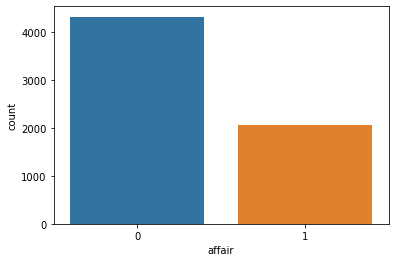

In [5]:
sns.countplot(dta['affair'])

In [6]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [7]:
dta['rate_marriage'].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [8]:
dta['children'] = dta['children'].replace([0.0,1.0,2.0,3.0,4.0,5.5],[0.0,1.0,2.0,3.0,4.0,5.0])

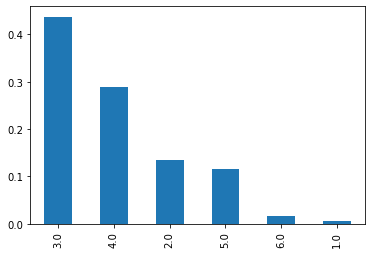

In [9]:
dta['occupation'].value_counts(normalize = True).plot(kind='bar')

In [10]:
dta['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

Text(0.5, 1.0, 'Bar plot between Occupation of Husband and time spent on affair')

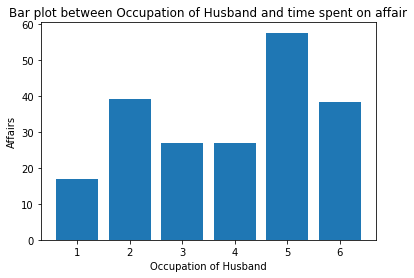

In [11]:
plt.bar(dta['occupation_husb'],dta['affairs'])
plt.xlabel('Occupation of Husband')
plt.ylabel('Affairs')
plt.title('Bar plot between Occupation of Husband and time spent on affair')

Text(0.5, 1.0, 'Bar plot between Occupation of Wife and time spent on affair')

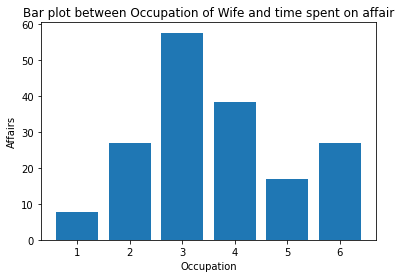

In [12]:
plt.bar(dta['occupation'],dta['affairs'])
plt.xlabel('Occupation')
plt.ylabel('Affairs')
plt.title('Bar plot between Occupation of Wife and time spent on affair')

<BarContainer object of 6366 artists>

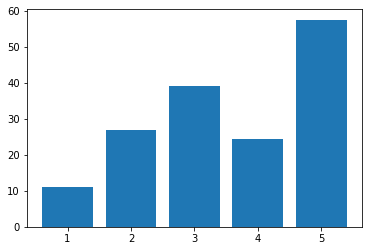

In [13]:
plt.bar(dta['rate_marriage'],dta['affairs'])

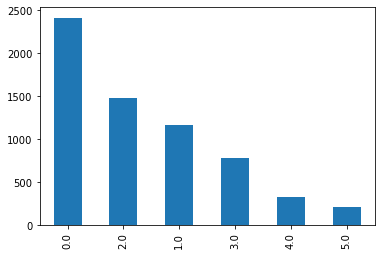

In [14]:
dta['children'].value_counts().plot.bar()

In [15]:
Children = pd.crosstab(index=dta['children'],columns=dta['affair'])
Children

affair,0,1
children,,
0.0,1912,502
1.0,747,412
2.0,873,608
3.0,460,321
4.0,197,131
5.0,124,79


In [16]:
Children.div(Children.sum(1).astype(float),axis=0)

affair,0,1
children,,
0.0,0.792046,0.207954
1.0,0.644521,0.355479
2.0,0.589467,0.410533
3.0,0.588988,0.411012
4.0,0.600610,0.399390
5.0,0.610837,0.389163


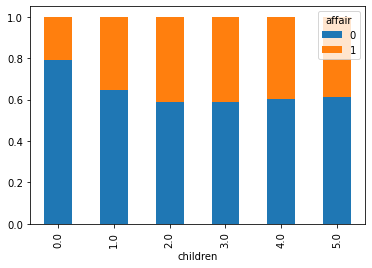

In [17]:
Children.div(Children.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [18]:
Religious = pd.crosstab(index=dta['religious'],columns=dta['affair'])
Religious

affair,0,1
religious,,
1.0,613,408
2.0,1448,819
3.0,1715,707
4.0,537,119


In [19]:
Religious.div(Religious.sum(1).astype(float),axis=0)

affair,0,1
religious,,
1.0,0.600392,0.399608
2.0,0.638730,0.361270
3.0,0.708092,0.291908
4.0,0.818598,0.181402


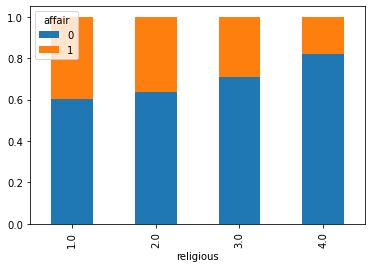

In [20]:
Religious.div(Religious.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [21]:
rating = pd.crosstab(index=dta['rate_marriage'],columns=dta['affair'])
rating

affair,0,1
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


Text(0, 0.5, 'Percentage')

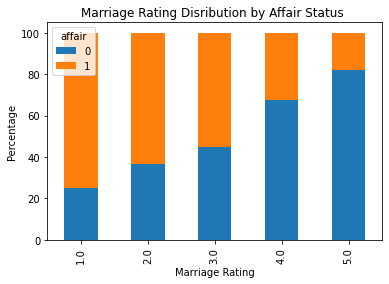

In [22]:
rating.div(rating.sum(1).astype(float)/100,axis=0).plot.bar(stacked=True)
plt.title('Marriage Rating Disribution by Affair Status ')
plt.xlabel('Marriage Rating')
plt.ylabel('Percentage')

In [23]:
years = pd.crosstab(index=dta['yrs_married'],columns=dta['affair'])
years

affair,0,1
yrs_married,,
0.5,354,16
2.5,1595,439
6.0,754,387
9.0,348,254
13.0,347,243
16.5,449,369
23.0,466,345


Text(0, 0.5, 'Percentage')

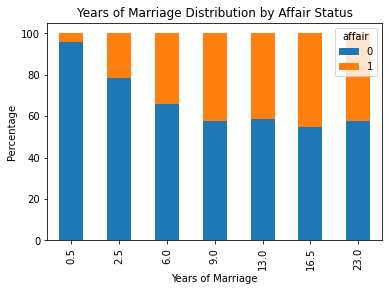

In [24]:
years.div(years.sum(1).astype(float)/100,axis=0).plot.bar(stacked=True)
plt.title('Years of Marriage Distribution by Affair Status')
plt.xlabel('Years of Marriage')
plt.ylabel('Percentage')

In [25]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


Text(0.5, 1.0, 'Heatmap of correlation between features')

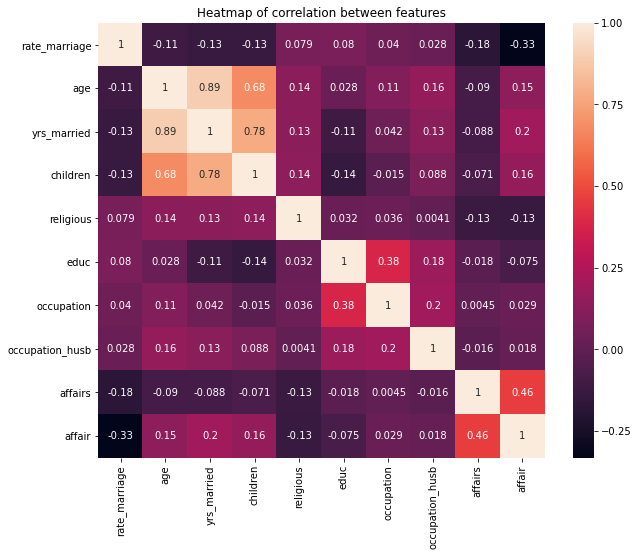

In [26]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(dta.corr(),annot = True)
ax.set_title('Heatmap of correlation between features')

In [27]:


y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe") 
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [28]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [29]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x = pd.DataFrame(sc_X.fit_transform(X),columns = X.columns)


In [30]:
x.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,0.0,2.531984,-0.881319,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.165012,0.653341,1.281153
1,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.165012,-1.623785,-0.096364
2,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.993657,-1.623785,0.821981
3,0.0,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.884568,0.653341,0.821981
4,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.274101,-1.623785,-0.096364


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)


In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred = lr.predict(x_test)
pred

array([0., 0., 1., ..., 0., 0., 0.])

In [34]:
metrics.accuracy_score(y_test,pred)

0.7214659685863875

In [35]:
cnf_matrics = metrics.confusion_matrix(y_test,pred)
cnf_matrics

array([[1152,  142],
       [ 390,  226]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

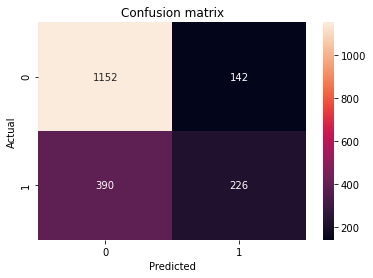

In [36]:
sns.heatmap(pd.DataFrame(cnf_matrics),annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')


In [37]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1294
         1.0       0.61      0.37      0.46       616

    accuracy                           0.72      1910
   macro avg       0.68      0.63      0.64      1910
weighted avg       0.70      0.72      0.70      1910



In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(),x,y,scoring='accuracy',cv=10)
scores

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.71943574, 0.70219436, 0.73824451, 0.70597484, 0.70440252,
       0.73113208, 0.73113208, 0.70754717, 0.75471698, 0.74685535])

In [39]:
scores.mean()

0.7241635614439779